In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(
    rc={"figure.figsize":(10, 6.5), 
        "figure.subplot.left":0.10,
        "figure.subplot.right":0.95,
        "figure.subplot.top":0.92,
        }
    )

In [2]:
df = pd.read_csv(f"../datasets/cbeci-annualized-consumption.csv")
df['date'] = [pd.to_datetime(x) for x in df['date']]

In [3]:
#df.info()

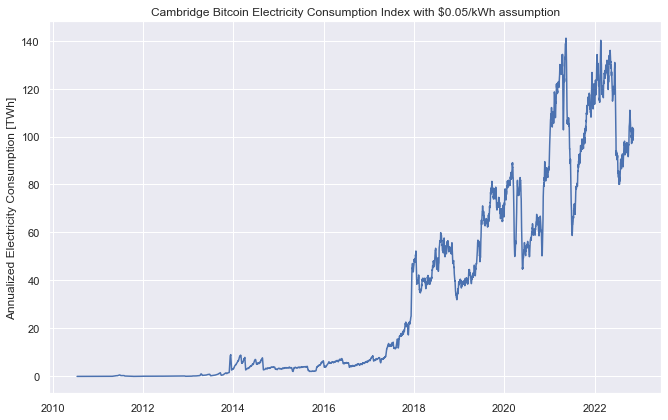

In [4]:
# Generate a line plot of US Industrial electricity prices
sns.lineplot(
    x=df['date'], 
    y=df['0.05'],
)
plt.title('Cambridge Bitcoin Electricity Consumption Index with $0.05/kWh assumption')
plt.xlabel('')
plt.ylabel('Annualized Electricity Consumption [TWh]')

plt.savefig('../tmp-figures/cbeci-default.png', transparent=False, facecolor='w')
plt.show()

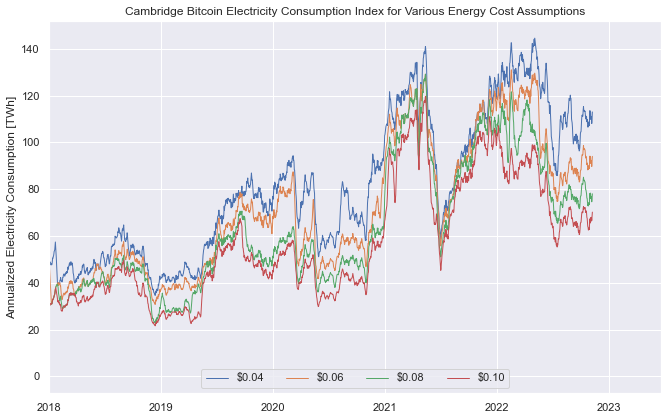

In [5]:
# Generate line plots for cost assumptions at $0.04, $0.06, $0.08, $0.10
yy = np.arange(0.04, 0.11, 0.02)

for xx in yy:
    sns.lineplot(
        x=df['date'], 
        y=df["{:.2f}".format(xx)],
        lw=1
    )

plt.title('Cambridge Bitcoin Electricity Consumption Index for Various Energy Cost Assumptions')
plt.xlabel('')
plt.ylabel('Annualized Electricity Consumption [TWh]')
plt.xlim([pd.to_datetime('2018-01-01'), None])

plt.legend(labels=["${:.2f}".format(x) for x in yy], ncol=4, loc='lower center')
plt.savefig('../tmp-figures/cbeci-various.png', transparent=False, facecolor='w')
plt.show()